<center><u><H1>Linear Discriminant Analysis(LDA)</H1></u></center>

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load the data

In [2]:
iris = load_iris()
X=iris.data
y=iris.target

## Preprocessing the data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2019)

In [4]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Defining models

In [5]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [6]:
X_lda = lda.fit_transform(X_std, y)

In [7]:
X_train_lda = lda.transform(X_train_std)
X_test_lda = lda.transform(X_test_std)

In [8]:
pca = PCA(n_components=2)

In [9]:
X_pca = pca.fit_transform(X_std)

### Variance Ratio

In [10]:
print(f"Explained Variance Ratio: {lda.explained_variance_ratio_}")

Explained Variance Ratio: [0.9912126 0.0087874]


In [11]:
print(f"{lda.explained_variance_ratio_.sum()}")

0.9999999999999999


### Training models with lda

In [12]:
svm = SVC(kernel='rbf', gamma=0.2)
knn = KNN(n_neighbors=2)

In [13]:
svm.fit(X_train_lda,y_train)
knn.fit(X_train_lda, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

## Evaluating models:

In [14]:
svm_pred = svm.predict(X_test_lda)
knn_pred = knn.predict(X_test_lda)

In [15]:
print(f"Accuracy Score (Support Vector Machines):{accuracy_score(y_test,svm_pred)}")
print(f"Accuracy Score (KNN):{accuracy_score(y_test,knn_pred)}")

Accuracy Score (Support Vector Machines):0.9777777777777777
Accuracy Score (KNN):0.9555555555555556


## Comparing transformations with LDA and PCA:

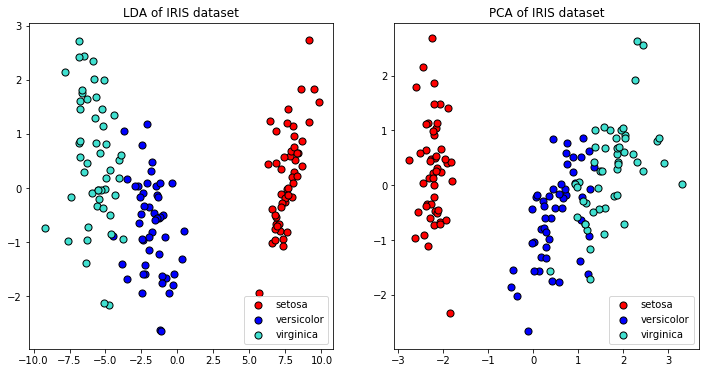

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plot_colors = ['red', 'blue', 'turquoise']
n_classes = len(np.unique(y))
X2D = X_std[:,[2,3]]

for cl, color in zip(range(n_classes), plot_colors):  
    axs[0].scatter(X_lda[y==cl, 0], X_lda[y==cl, 1], s=50, marker='o', c=color, edgecolor='k', label=iris.target_names[cl])
    axs[0].legend(loc='best', fancybox=True)
    axs[0].set_title('LDA of IRIS dataset')

for cl, color in zip(range(n_classes), plot_colors): 
    axs[1].scatter(X_pca[y==cl, 0], X_pca[y==cl, 1], s=50, marker='o', c=color, edgecolor='k', label=iris.target_names[cl])
    axs[1].legend(loc='best', fancybox=True)
    axs[1].set_title('PCA of IRIS dataset')

## Reference: 
http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html